# Wind profile with different ZREFM

In [26]:
import matplotlib.pyplot as plt
import numpy as np
import proplot as pplt # New plot library (https://proplot.readthedocs.io/en/latest/)
pplt.rc['savefig.dpi'] = 300 # 1200 is too big! #https://proplot.readthedocs.io/en/latest/basics.html#Creating-figures

## ZREF == 1 (actual)

/tmp/ipykernel_159745/108870297.py:21: RuntimeWarning: invalid value encountered in log
  U = (u_star / kappa) * np.log((z - DISP) / ZOMC)
/tmp/ipykernel_159745/108870297.py:64: RuntimeWarning: invalid value encountered in log
  U = (u_star / kappa) * np.log((z - DISPS) / ZOMCS)
/tmp/ipykernel_159745/108870297.py:160: RuntimeWarning: invalid value encountered in log
  U = (u_star / kappa) * np.log((z - DISP) / ZOMC)
/tmp/ipykernel_159745/108870297.py:204: RuntimeWarning: invalid value encountered in log
  U = (u_star / kappa) * np.log((z - DISPS) / ZOMCS)


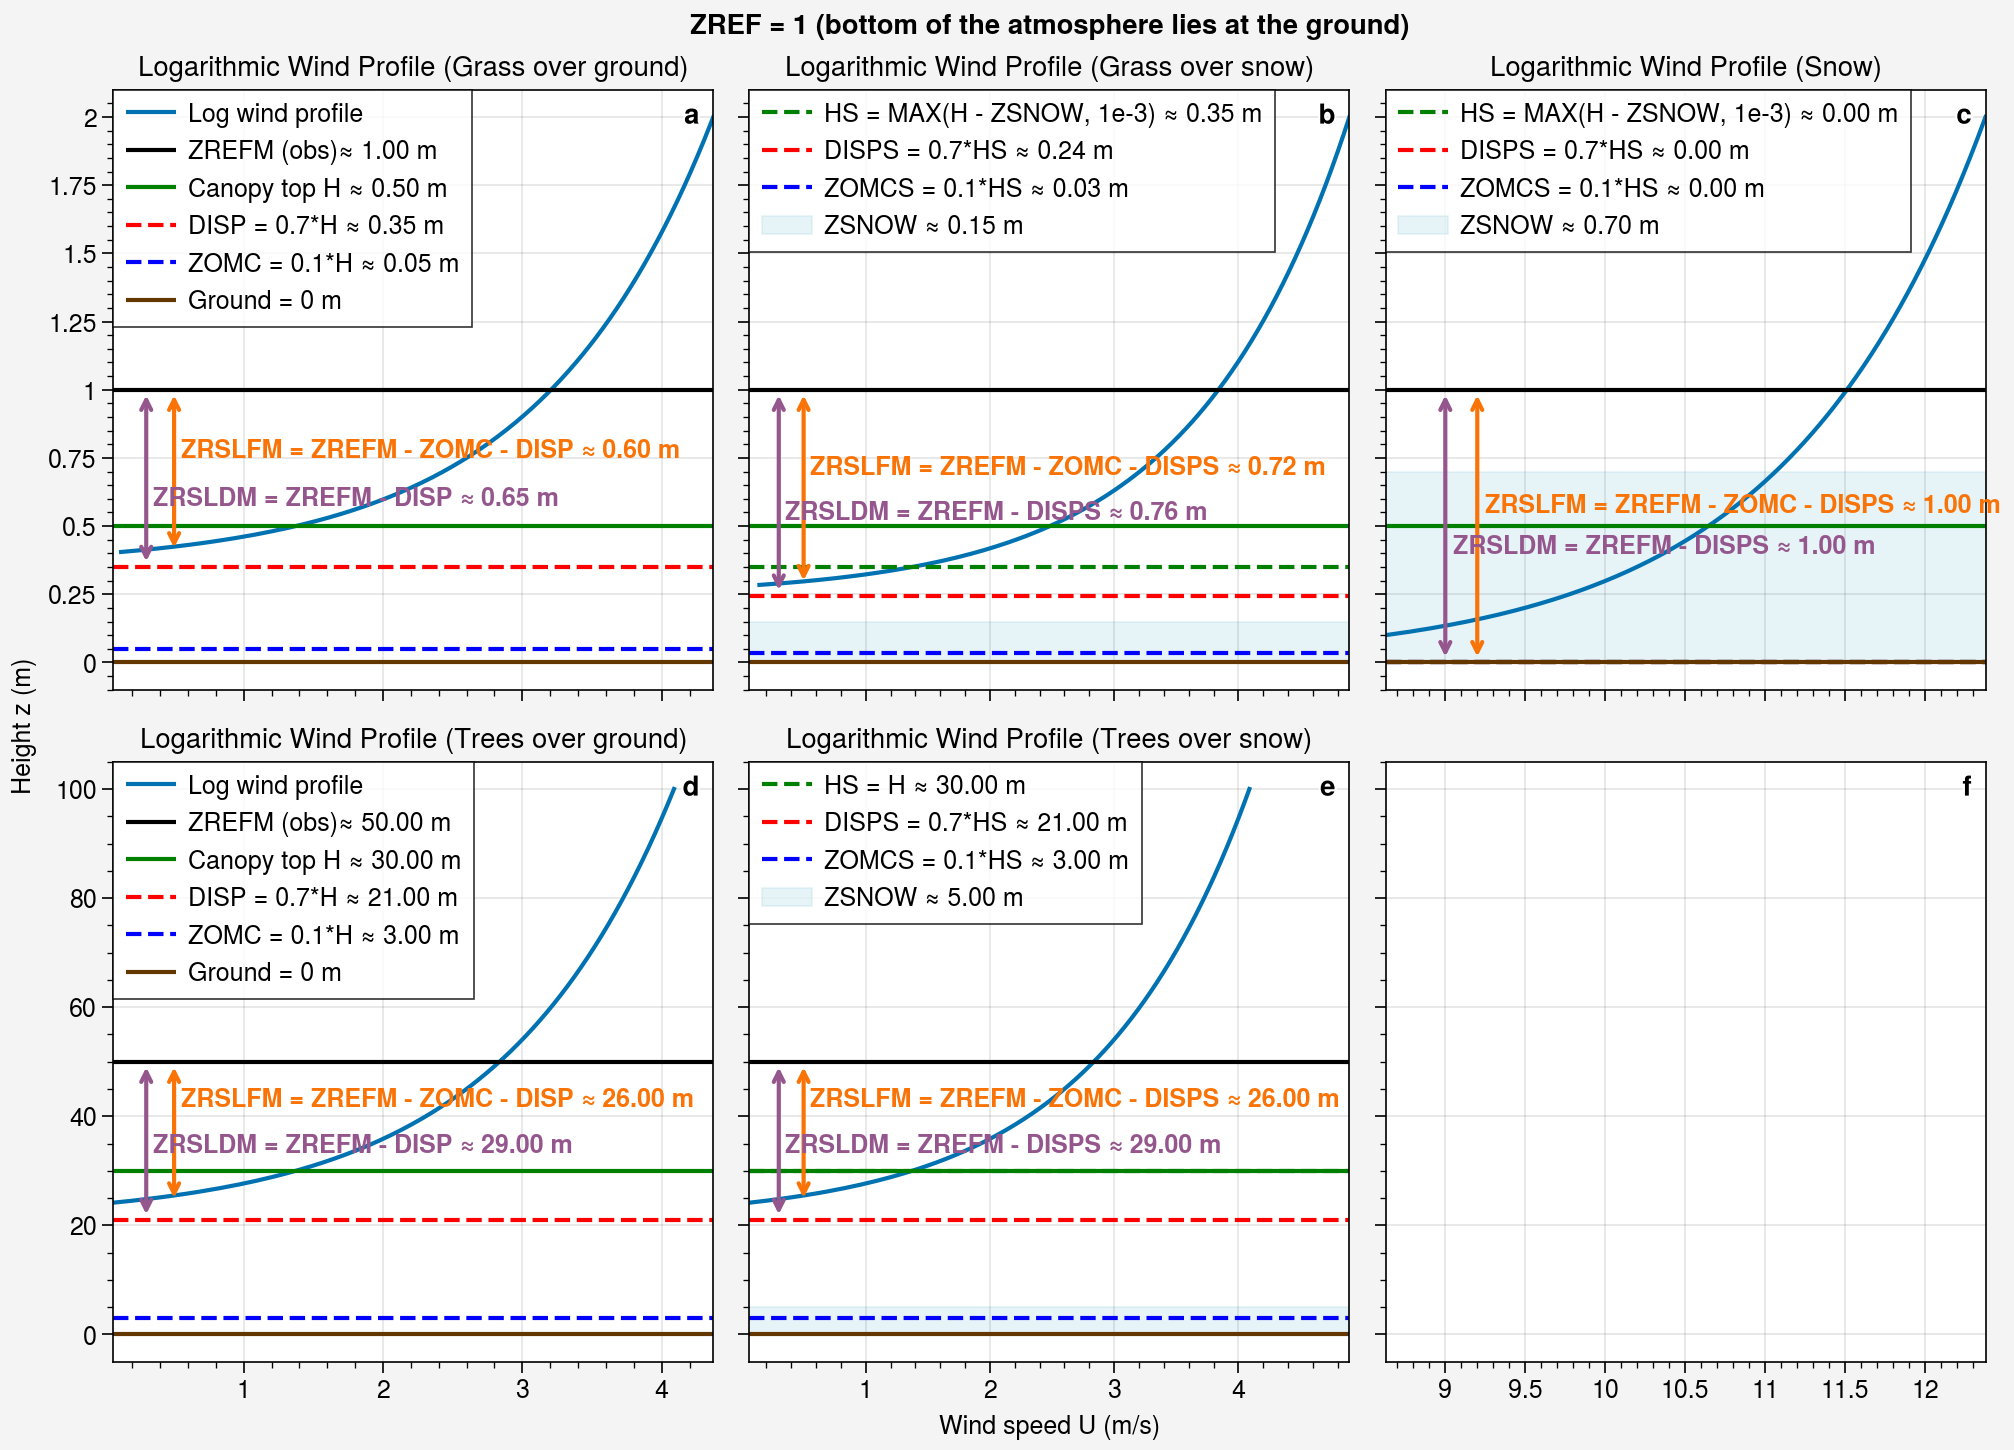

In [192]:
# Parameters
ZBLEND = 50.0 # atmospheric blending height for surface roughness length averaging (\f$z_b\f$) [m]
kappa = 0.4  # von Kármán constant
u_star = 0.5  # friction velocity (m/s)

fig, axs = pplt.subplots(nrows=2, ncols=3, refwidth=3)

############
## GRASS ###
############

H = 0.5 # Vegetation height [m]
ZOMC = 0.1 * H # Roughness length for momentum of vegetation over bare ground [m]
DISP = 0.7 * H # Displacement height of vegetation over ground (d) [m]
ZREFM = 1.0 # Obs height above the ground [m]

# Vertical profile
z = np.linspace(0.1, 2, 300)  # height above ground (m)

# Logarithmic wind profile (neutral conditions)
U = (u_star / kappa) * np.log((z - DISP) / ZOMC) 
U[z <= DISP + ZOMC] = np.nan  # undefined below (d+z0)

# Calculate ZRSLDM and ZRSLFM
ZRSLDM = ZREFM - DISP
ZRSLFM = ZREFM - ZOMC - DISP

# Plot
ax = axs[0]
ax.plot(U, z, label="Log wind profile")
ax.axhline(y=ZREFM, color="black", linestyle="-", label=f"ZREFM (obs)≈ {ZREFM:.2f} m")
ax.axhline(y=H, color="green", linestyle="-", label=f"Canopy top H ≈ {H:.2f} m")
ax.axhline(y=DISP, color="red", linestyle="--", label=f"DISP = 0.7*H ≈ {DISP:.2f} m")
ax.axhline(y=ZOMC, color="blue", linestyle="--", label=f"ZOMC = 0.1*H ≈ {ZOMC:.2f} m")
ax.axhline(y=0, color="brown", linestyle="-", label=f"Ground = 0 m")

# Add ZRSLDM and ZRSLFM annotations
ax.annotate('', xy=(0.5, ZREFM), xytext=(0.5, ZREFM-ZRSLFM),
            arrowprops=dict(arrowstyle='<->', color='orange', lw=1.5))
ax.text(0.55, (2*ZREFM - ZRSLFM)/2+0.075, f"ZRSLFM = ZREFM - ZOMC - DISP ≈ {ZRSLFM:.2f} m", va='center', ha='left', 
        color='orange', fontweight='bold')

ax.annotate('', xy=(0.3, ZREFM), xytext=(0.3, ZREFM-ZRSLDM),
            arrowprops=dict(arrowstyle='<->', color='purple', lw=1.5))
ax.text(0.35, (2*ZREFM - ZRSLDM)/2-0.075, f"ZRSLDM = ZREFM - DISP ≈ {ZRSLDM:.2f} m", va='center', ha='left', 
        color='purple', fontweight='bold')



ax.format(
    xlabel="Wind speed U (m/s)",
    ylabel="Height z (m)",
    title="Logarithmic Wind Profile (Grass over ground)"
)
ax.legend(ncol=1, loc='ul')

# Subplot with grass over snow
ZSNOW = 0.15
HS = np.maximum(H - ZSNOW, 1.0e-3)
DISPS = 0.7 * HS # Displacement height of vegetation over snow (d) [m]
ZOMCS = 0.1 * HS # roughness length for momentum of vegetation over snow [ ]

# Logarithmic wind profile (neutral conditions)
U = (u_star / kappa) * np.log((z - DISPS) / ZOMCS) 
U[z <= DISPS + ZOMCS] = np.nan  # undefined below (d+z0)

# Calculate ZRSLDM and ZRSLFM for snow case
ZRSLDM = ZREFM - DISPS
ZRSLFM = ZREFM - ZOMCS - DISPS

# Plot
ax = axs[1]
# Add snow shading
ax.axhspan(0, ZSNOW, alpha=0.3, color='lightblue', label=f"ZSNOW ≈ {ZSNOW:.2f} m")
ax.plot(U, z)
ax.axhline(y=ZREFM, color="black", linestyle="-")
ax.axhline(y=H, color="green", linestyle="-")
ax.axhline(y=HS, color="green", linestyle="--", label=f"HS = MAX(H - ZSNOW, 1e-3) ≈ {HS:.2f} m")
ax.axhline(y=DISPS, color="red", linestyle="--", label=f"DISPS = 0.7*HS ≈ {DISPS:.2f} m")
ax.axhline(y=ZOMCS, color="blue", linestyle="--", label=f"ZOMCS = 0.1*HS ≈ {ZOMCS:.2f} m")
ax.axhline(y=0, color="brown", linestyle="-")

# Add ZRSLDM and ZRSLFM annotations
ax.annotate('', xy=(0.5, ZREFM), xytext=(0.5, ZREFM-ZRSLFM),
            arrowprops=dict(arrowstyle='<->', color='orange', lw=1.5))
ax.text(0.55, (2*ZREFM - ZRSLFM)/2+0.075, f"ZRSLFM = ZREFM - ZOMC - DISPS ≈ {ZRSLFM:.2f} m", va='center', ha='left', 
        color='orange', fontweight='bold')

ax.annotate('', xy=(0.3, ZREFM), xytext=(0.3, ZREFM-ZRSLDM),
            arrowprops=dict(arrowstyle='<->', color='purple', lw=1.5))
ax.text(0.35, (2*ZREFM - ZRSLDM)/2-0.075, f"ZRSLDM = ZREFM - DISPS ≈ {ZRSLDM:.2f} m", va='center', ha='left', 
        color='purple', fontweight='bold')

ax.format(
    xlabel="Wind speed U (m/s)",
    ylabel="Height z (m)",
    title="Logarithmic Wind Profile (Grass over snow)"
)
ax.legend(ncol=1, loc='ul')



# Subplot with deep snow
ZSNOW = 0.70
HS = np.maximum(H - ZSNOW, 1.0e-3)
DISPS = 0.7 * HS # Displacement height of vegetation over snow (d) [m]
ZOMCS = 0.1 * HS # roughness length for momentum of vegetation over snow [ ]

# Logarithmic wind profile (neutral conditions)
U = (u_star / kappa) * np.log((z - DISPS) / ZOMCS) 
U[z <= DISPS + ZOMCS] = np.nan  # undefined below (d+z0)

# Calculate ZRSLDM and ZRSLFM for deep snow case
ZRSLDM = ZREFM - DISPS
ZRSLFM = ZREFM - ZOMCS - DISPS

# Plot
ax = axs[2]
# Add snow shading
ax.axhspan(0, ZSNOW, alpha=0.3, color='lightblue', label=f"ZSNOW ≈ {ZSNOW:.2f} m")
ax.plot(U, z)
ax.axhline(y=ZREFM, color="black", linestyle="-")
ax.axhline(y=H, color="green", linestyle="-")
ax.axhline(y=HS, color="green", linestyle="--", label=f"HS = MAX(H - ZSNOW, 1e-3) ≈ {HS:.2f} m")
ax.axhline(y=DISPS, color="red", linestyle="--", label=f"DISPS = 0.7*HS ≈ {DISPS:.2f} m")
ax.axhline(y=ZOMCS, color="blue", linestyle="--", label=f"ZOMCS = 0.1*HS ≈ {ZOMCS:.2f} m")
ax.axhline(y=0, color="brown", linestyle="-")

# Add ZRSLDM and ZRSLFM annotations
ax.annotate('', xy=(9.2, ZREFM), xytext=(9.2, ZREFM-ZRSLFM),
            arrowprops=dict(arrowstyle='<->', color='orange', lw=1.5))
ax.text(9.25, (2*ZREFM - ZRSLFM)/2+0.075, f"ZRSLFM = ZREFM - ZOMC - DISPS ≈ {ZRSLFM:.2f} m", va='center', ha='left', 
        color='orange', fontweight='bold')

ax.annotate('', xy=(9.0, ZREFM), xytext=(9.0, ZREFM-ZRSLDM),
            arrowprops=dict(arrowstyle='<->', color='purple', lw=1.5))
ax.text(9.05, (2*ZREFM - ZRSLDM)/2-0.075, f"ZRSLDM = ZREFM - DISPS ≈ {ZRSLDM:.2f} m", va='center', ha='left', 
        color='purple', fontweight='bold')

ax.format(
    xlabel="Wind speed U (m/s)",
    ylabel="Height z (m)",
    title="Logarithmic Wind Profile (Snow)"
)
ax.legend(ncol=1, loc='ul')

############
## TREES ###
############

H = 30 # Vegetation height [m]
ZOMC = 0.1 * H # Roughness length for momentum of vegetation over bare ground [m]
DISP = 0.7 * H # Displacement height of vegetation over ground (d) [m]
ZREFM = 50.0 # Obs height above the ground [m]

# Vertical profile
z = np.linspace(0.1, 100, 300)  # height above ground (m)

# Logarithmic wind profile (neutral conditions)
U = (u_star / kappa) * np.log((z - DISP) / ZOMC) 
U[z <= DISP + ZOMC] = np.nan  # undefined below (d+z0)

# Calculate ZRSLDM and ZRSLFM for trees
ZRSLDM = ZREFM - DISP
ZRSLFM = ZREFM - ZOMC - DISP

# Plot
ax = axs[3]
ax.plot(U, z, label="Log wind profile")
ax.axhline(y=ZREFM, color="black", linestyle="-", label=f"ZREFM (obs)≈ {ZREFM:.2f} m")
ax.axhline(y=H, color="green", linestyle="-", label=f"Canopy top H ≈ {H:.2f} m")
ax.axhline(y=DISP, color="red", linestyle="--", label=f"DISP = 0.7*H ≈ {DISP:.2f} m")
ax.axhline(y=ZOMC, color="blue", linestyle="--", label=f"ZOMC = 0.1*H ≈ {ZOMC:.2f} m")
ax.axhline(y=0, color="brown", linestyle="-", label=f"Ground = 0 m")

# Add ZRSLDM and ZRSLFM annotations
ax.annotate('', xy=(0.5, ZREFM), xytext=(0.5, ZREFM-ZRSLFM),
            arrowprops=dict(arrowstyle='<->', color='orange', lw=1.5))
ax.text(0.55, (2*ZREFM - ZRSLFM)/2+6, f"ZRSLFM = ZREFM - ZOMC - DISP ≈ {ZRSLFM:.2f} m", va='center', ha='left', 
        color='orange', fontweight='bold')

ax.annotate('', xy=(0.3, ZREFM), xytext=(0.3, ZREFM-ZRSLDM),
            arrowprops=dict(arrowstyle='<->', color='purple', lw=1.5))
ax.text(0.35, (2*ZREFM - ZRSLDM)/2-1, f"ZRSLDM = ZREFM - DISP ≈ {ZRSLDM:.2f} m", va='center', ha='left', 
        color='purple', fontweight='bold')

ax.format(
    xlabel="Wind speed U (m/s)",
    ylabel="Height z (m)",
    title="Logarithmic Wind Profile (Trees over ground)"
)
ax.legend(ncol=1, loc='ul')



# Subplot with trees over snow
ZSNOW = 5.0
# HS = np.maximum(H - ZSNOW, 1.0e-3)
HS = H
DISPS = 0.7 * HS # Displacement height of vegetation over snow (d) [m]
ZOMCS = 0.1 * HS # roughness length for momentum of vegetation over snow [ ]

# Logarithmic wind profile (neutral conditions)
U = (u_star / kappa) * np.log((z - DISPS) / ZOMCS) 
U[z <= DISPS + ZOMCS] = np.nan  # undefined below (d+z0)

# Calculate ZRSLDM and ZRSLFM for trees over snow
ZRSLDM = ZREFM - DISPS
ZRSLFM = ZREFM - ZOMCS - DISPS

# Plot
ax = axs[4]
# Add snow shading
ax.axhspan(0, ZSNOW, alpha=0.3, color='lightblue', label=f"ZSNOW ≈ {ZSNOW:.2f} m")
ax.plot(U, z)
ax.axhline(y=ZREFM, color="black", linestyle="-")
ax.axhline(y=H, color="green", linestyle="-")
ax.axhline(y=HS, color="green", linestyle="--", label=f"HS = H ≈ {HS:.2f} m")
ax.axhline(y=DISPS, color="red", linestyle="--", label=f"DISPS = 0.7*HS ≈ {DISPS:.2f} m")
ax.axhline(y=ZOMCS, color="blue", linestyle="--", label=f"ZOMCS = 0.1*HS ≈ {ZOMCS:.2f} m")
ax.axhline(y=0, color="brown", linestyle="-")

# Add ZRSLDM and ZRSLFM annotations
ax.annotate('', xy=(0.5, ZREFM), xytext=(0.5, ZREFM-ZRSLFM),
            arrowprops=dict(arrowstyle='<->', color='orange', lw=1.5))
ax.text(0.55, (2*ZREFM - ZRSLFM)/2+6, f"ZRSLFM = ZREFM - ZOMC - DISPS ≈ {ZRSLFM:.2f} m", va='center', ha='left', 
        color='orange', fontweight='bold')

ax.annotate('', xy=(0.3, ZREFM), xytext=(0.3, ZREFM-ZRSLDM),
            arrowprops=dict(arrowstyle='<->', color='purple', lw=1.5))
ax.text(0.35, (2*ZREFM - ZRSLDM)/2-1, f"ZRSLDM = ZREFM - DISPS ≈ {ZRSLDM:.2f} m", va='center', ha='left', 
        color='purple', fontweight='bold')

ax.format(
    xlabel="Wind speed U (m/s)",
    ylabel="Height z (m)",
    title="Logarithmic Wind Profile (Trees over snow)"
)
ax.legend(ncol=1, loc='ul')

axs.format(abc=True, abcloc='ur')
fig.suptitle('ZREF = 1 (bottom of the atmosphere lies at the ground)')
# fig.save("img/wind_profiles_ZREF1.pdf")

## ZREF == 1 (correct?)

/tmp/ipykernel_159745/892080846.py:23: RuntimeWarning: invalid value encountered in log
  U = (u_star / kappa) * np.log((z - DISP - ZSNOW) / ZOMC)
/tmp/ipykernel_159745/892080846.py:66: RuntimeWarning: invalid value encountered in log
  U = (u_star / kappa) * np.log((z - DISPS - ZSNOW) / ZOMCS)
/tmp/ipykernel_159745/892080846.py:112: RuntimeWarning: invalid value encountered in log
  U = (u_star / kappa) * np.log((z - DISPS - ZSNOW) / ZOMCS)
/tmp/ipykernel_159745/892080846.py:162: RuntimeWarning: invalid value encountered in log
  U = (u_star / kappa) * np.log((z - DISP) / ZOMC)
/tmp/ipykernel_159745/892080846.py:206: RuntimeWarning: invalid value encountered in log
  U = (u_star / kappa) * np.log((z - DISPS) / ZOMCS)


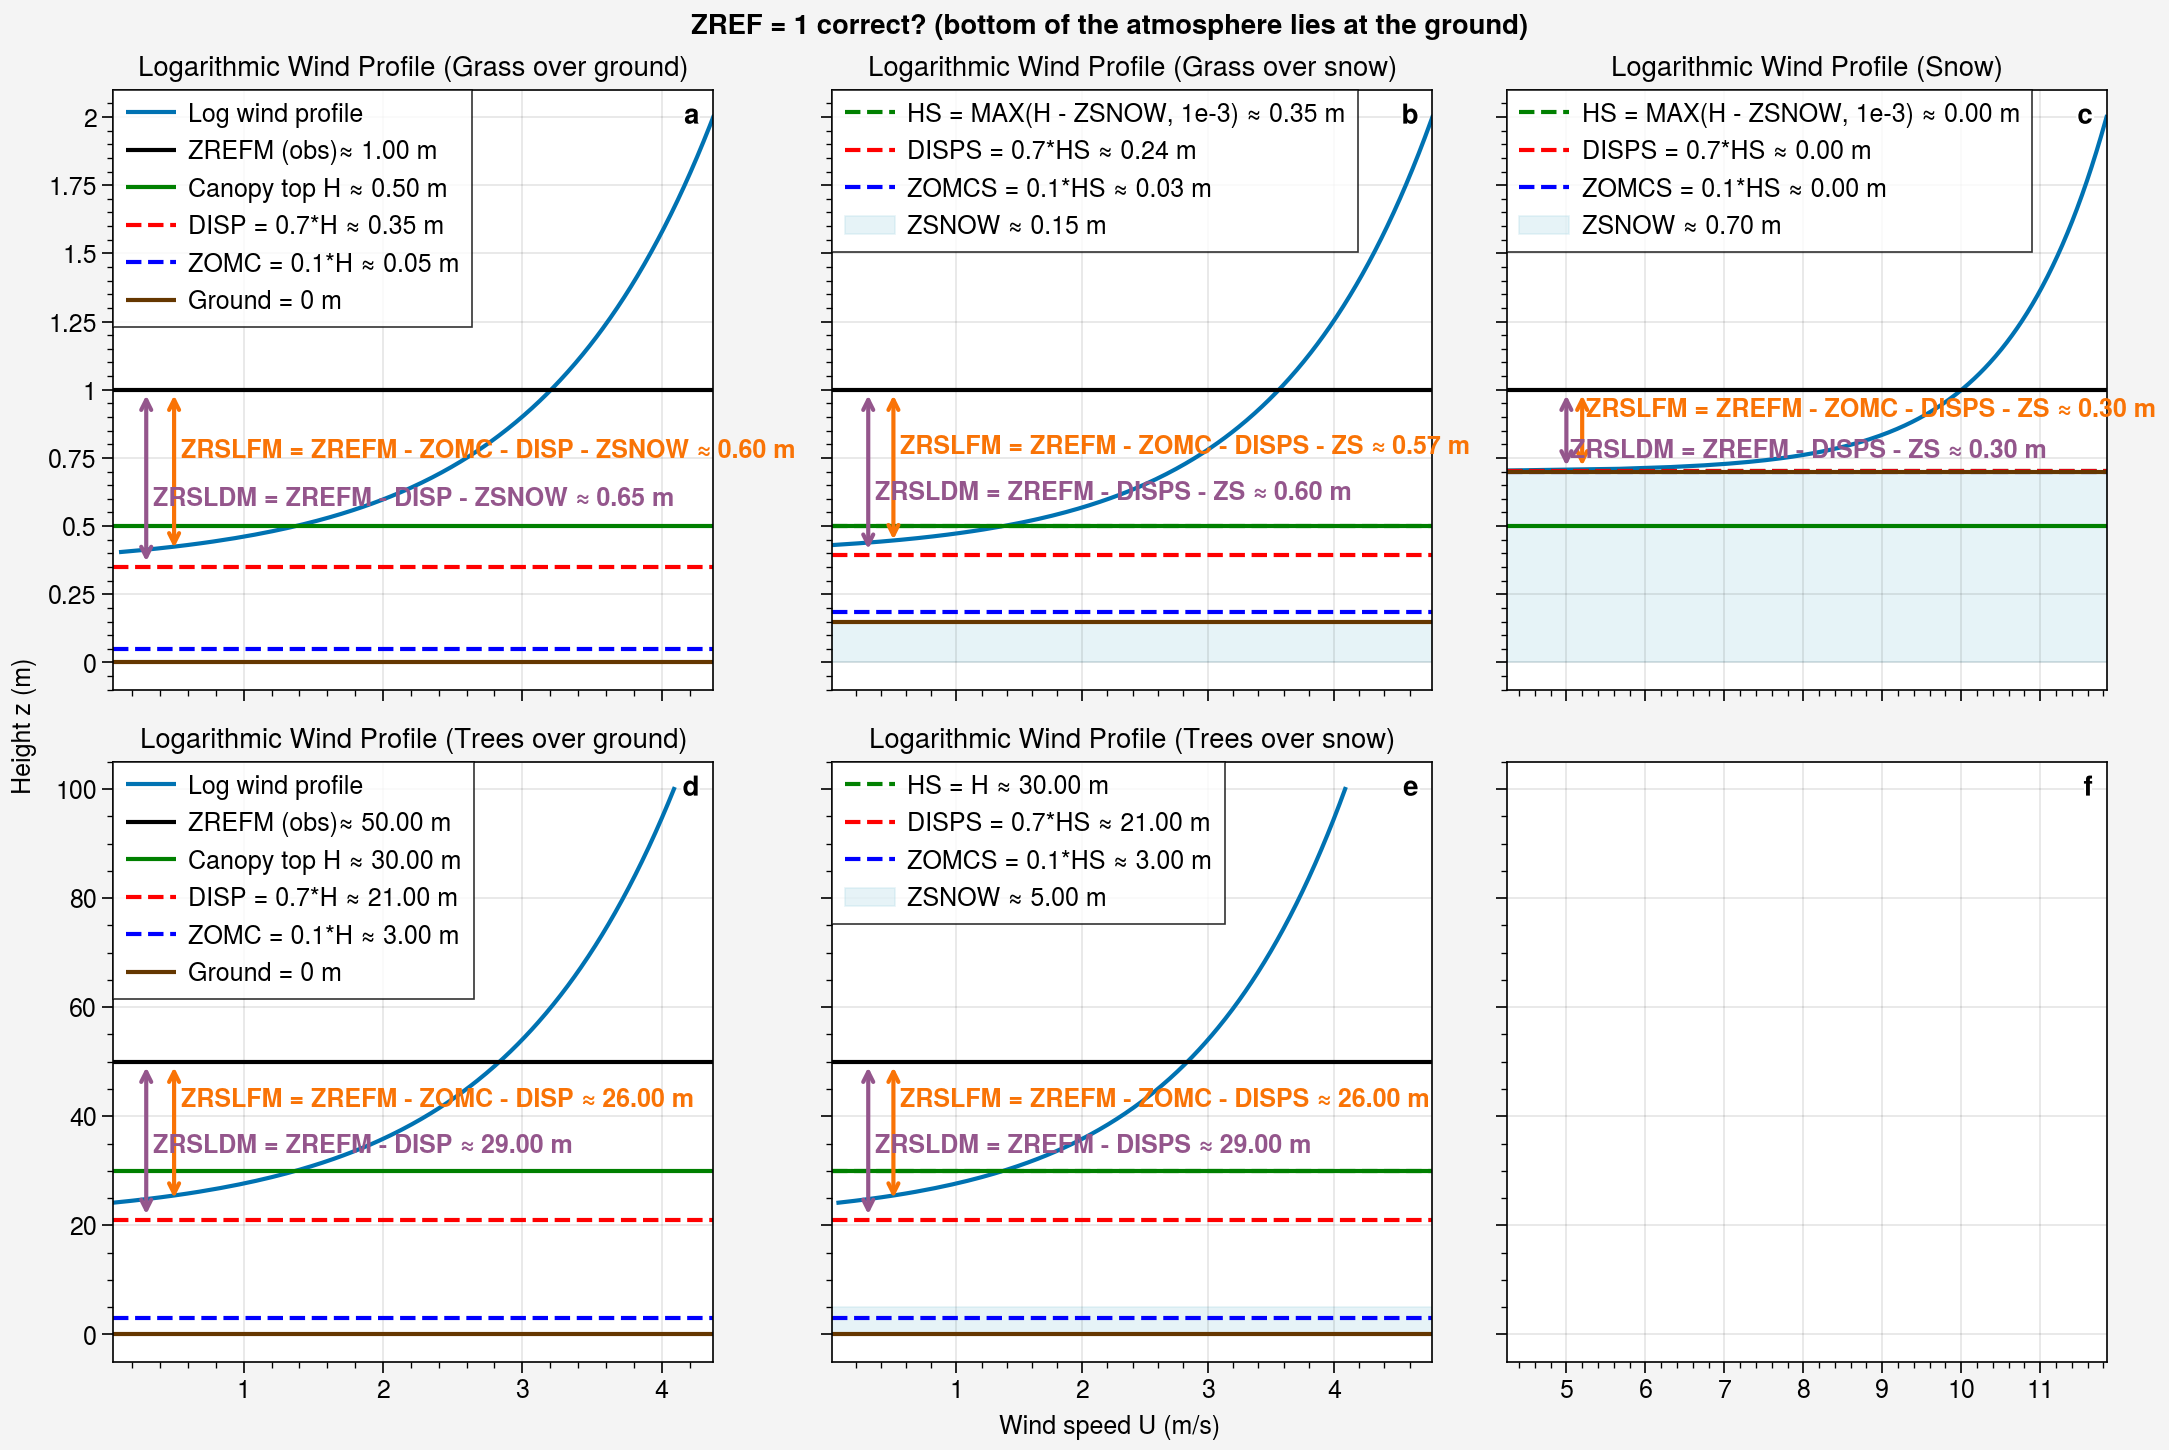

In [191]:
# Parameters
ZBLEND = 50.0 # atmospheric blending height for surface roughness length averaging (\f$z_b\f$) [m]
kappa = 0.4  # von Kármán constant
u_star = 0.5  # friction velocity (m/s)

fig, axs = pplt.subplots(nrows=2, ncols=3, refwidth=3)

############
## GRASS ###
############


ZSNOW = 0.0
H = 0.5 # Vegetation height [m]
ZOMC = 0.1 * H # Roughness length for momentum of vegetation over bare ground [m]
DISP = 0.7 * H # Displacement height of vegetation over ground (d) [m]
ZREFM = 1.0 # Obs height above the ground [m]

# Vertical profile
z = np.linspace(0.1, 2, 300)  # height above ground (m)

# Logarithmic wind profile (neutral conditions)
U = (u_star / kappa) * np.log((z - DISP - ZSNOW) / ZOMC) 
U[z <= DISP + ZOMC] = np.nan  # undefined below (d+z0)

# Calculate ZRSLDM and ZRSLFM
ZRSLDM = ZREFM - DISP - ZSNOW
ZRSLFM = ZREFM - ZOMC - DISP - ZSNOW

# Plot
ax = axs[0]
ax.plot(U, z, label="Log wind profile")
ax.axhline(y=ZREFM, color="black", linestyle="-", label=f"ZREFM (obs)≈ {ZREFM:.2f} m")
ax.axhline(y=H, color="green", linestyle="-", label=f"Canopy top H ≈ {H:.2f} m")
ax.axhline(y=DISP, color="red", linestyle="--", label=f"DISP = 0.7*H ≈ {DISP:.2f} m")
ax.axhline(y=ZOMC, color="blue", linestyle="--", label=f"ZOMC = 0.1*H ≈ {ZOMC:.2f} m")
ax.axhline(y=0, color="brown", linestyle="-", label=f"Ground = 0 m")

# Add ZRSLDM and ZRSLFM annotations
ax.annotate('', xy=(0.5, ZREFM), xytext=(0.5, ZREFM-ZRSLFM),
            arrowprops=dict(arrowstyle='<->', color='orange', lw=1.5))
ax.text(0.55, (2*ZREFM - ZRSLFM)/2+0.075, f"ZRSLFM = ZREFM - ZOMC - DISP - ZSNOW ≈ {ZRSLFM:.2f} m", va='center', ha='left', 
        color='orange', fontweight='bold')

ax.annotate('', xy=(0.3, ZREFM), xytext=(0.3, ZREFM-ZRSLDM),
            arrowprops=dict(arrowstyle='<->', color='purple', lw=1.5))
ax.text(0.35, (2*ZREFM - ZRSLDM)/2-0.075, f"ZRSLDM = ZREFM - DISP - ZSNOW ≈ {ZRSLDM:.2f} m", va='center', ha='left', 
        color='purple', fontweight='bold')



ax.format(
    xlabel="Wind speed U (m/s)",
    ylabel="Height z (m)",
    title="Logarithmic Wind Profile (Grass over ground)"
)
ax.legend(ncol=1, loc='ul')

# Subplot with grass over snow
ZSNOW = 0.15
HS = np.maximum(H - ZSNOW, 1.0e-3)
DISPS = 0.7 * HS # Displacement height of vegetation over snow (d) [m]
ZOMCS = 0.1 * HS # roughness length for momentum of vegetation over snow [ ]

# Logarithmic wind profile (neutral conditions)
U = (u_star / kappa) * np.log((z - DISPS - ZSNOW) / ZOMCS) 
U[z <= DISPS + ZSNOW + ZOMCS] = np.nan  # undefined below (d+z0)

# Calculate ZRSLDM and ZRSLFM for snow case
ZRSLDM = ZREFM - DISPS - ZSNOW
ZRSLFM = ZREFM - ZOMCS - DISPS - ZSNOW

# Plot
ax = axs[1]
# Add snow shading
ax.axhspan(0, ZSNOW, alpha=0.3, color='lightblue', label=f"ZSNOW ≈ {ZSNOW:.2f} m")
ax.plot(U, z)
ax.axhline(y=ZREFM, color="black", linestyle="-")
ax.axhline(y=H, color="green", linestyle="-")
ax.axhline(y=HS+ZSNOW, color="green", linestyle="--", label=f"HS = MAX(H - ZSNOW, 1e-3) ≈ {HS:.2f} m")
ax.axhline(y=DISPS+ZSNOW, color="red", linestyle="--", label=f"DISPS = 0.7*HS ≈ {DISPS:.2f} m")
ax.axhline(y=ZOMCS+ZSNOW, color="blue", linestyle="--", label=f"ZOMCS = 0.1*HS ≈ {ZOMCS:.2f} m")
ax.axhline(y=ZSNOW, color="brown", linestyle="-")

# Add ZRSLDM and ZRSLFM annotations
ax.annotate('', xy=(0.5, ZREFM), xytext=(0.5, ZREFM-ZRSLFM),
            arrowprops=dict(arrowstyle='<->', color='orange', lw=1.5))
ax.text(0.55, (2*ZREFM - ZRSLFM)/2+0.075, f"ZRSLFM = ZREFM - ZOMC - DISPS - ZS ≈ {ZRSLFM:.2f} m", va='center', ha='left', 
        color='orange', fontweight='bold')

ax.annotate('', xy=(0.3, ZREFM), xytext=(0.3, ZREFM-ZRSLDM),
            arrowprops=dict(arrowstyle='<->', color='purple', lw=1.5))
ax.text(0.35, (2*ZREFM - ZRSLDM)/2-0.075, f"ZRSLDM = ZREFM - DISPS - ZS ≈ {ZRSLDM:.2f} m", va='center', ha='left', 
        color='purple', fontweight='bold')

ax.format(
    xlabel="Wind speed U (m/s)",
    ylabel="Height z (m)",
    title="Logarithmic Wind Profile (Grass over snow)"
)
ax.legend(ncol=1, loc='ul')



# Subplot with deep snow
ZSNOW = 0.70
HS = np.maximum(H - ZSNOW, 1.0e-3)
DISPS = 0.7 * HS # Displacement height of vegetation over snow (d) [m]
ZOMCS = 0.1 * HS # roughness length for momentum of vegetation over snow [ ]

# Logarithmic wind profile (neutral conditions)
U = (u_star / kappa) * np.log((z - DISPS - ZSNOW) / ZOMCS) 
U[z <= DISPS + ZOMCS] = np.nan  # undefined below (d+z0)

# Calculate ZRSLDM and ZRSLFM for deep snow case
ZRSLDM = ZREFM - DISPS - ZSNOW
ZRSLFM = ZREFM - ZOMCS - DISPS - ZSNOW

# Plot
ax = axs[2]
# Add snow shading
ax.axhspan(0, ZSNOW, alpha=0.3, color='lightblue', label=f"ZSNOW ≈ {ZSNOW:.2f} m")
ax.plot(U, z)
ax.axhline(y=ZREFM, color="black", linestyle="-")
ax.axhline(y=H, color="green", linestyle="-")
ax.axhline(y=HS + ZSNOW, color="green", linestyle="--", label=f"HS = MAX(H - ZSNOW, 1e-3) ≈ {HS:.2f} m")
ax.axhline(y=DISPS + ZSNOW, color="red", linestyle="--", label=f"DISPS = 0.7*HS ≈ {DISPS:.2f} m")
ax.axhline(y=ZOMCS + ZSNOW, color="blue", linestyle="--", label=f"ZOMCS = 0.1*HS ≈ {ZOMCS:.2f} m")
ax.axhline(y=ZSNOW, color="brown", linestyle="-")

# Add ZRSLDM and ZRSLFM annotations
ax.annotate('', xy=(5.2, ZREFM), xytext=(5.2, ZREFM-ZRSLFM),
            arrowprops=dict(arrowstyle='<->', color='orange', lw=1.5))
ax.text(5.25, (2*ZREFM - ZRSLFM)/2+0.075, f"ZRSLFM = ZREFM - ZOMC - DISPS - ZS ≈ {ZRSLFM:.2f} m", va='center', ha='left', 
        color='orange', fontweight='bold')

ax.annotate('', xy=(5.0, ZREFM), xytext=(5.0, ZREFM-ZRSLDM),
            arrowprops=dict(arrowstyle='<->', color='purple', lw=1.5))
ax.text(5.05, (2*ZREFM - ZRSLDM)/2-0.075, f"ZRSLDM = ZREFM - DISPS - ZS ≈ {ZRSLDM:.2f} m", va='center', ha='left', 
        color='purple', fontweight='bold')

ax.format(
    xlabel="Wind speed U (m/s)",
    ylabel="Height z (m)",
    title="Logarithmic Wind Profile (Snow)"
)
ax.legend(ncol=1, loc='ul')

############
## TREES ###
############

H = 30 # Vegetation height [m]
ZOMC = 0.1 * H # Roughness length for momentum of vegetation over bare ground [m]
DISP = 0.7 * H # Displacement height of vegetation over ground (d) [m]
ZREFM = 50.0 # Obs height above the ground [m]

# Vertical profile
z = np.linspace(0.1, 100, 300)  # height above ground (m)

# Logarithmic wind profile (neutral conditions)
U = (u_star / kappa) * np.log((z - DISP) / ZOMC) 
U[z <= DISP + ZOMC] = np.nan  # undefined below (d+z0)

# Calculate ZRSLDM and ZRSLFM for trees
ZRSLDM = ZREFM - DISP
ZRSLFM = ZREFM - ZOMC - DISP

# Plot
ax = axs[3]
ax.plot(U, z, label="Log wind profile")
ax.axhline(y=ZREFM, color="black", linestyle="-", label=f"ZREFM (obs)≈ {ZREFM:.2f} m")
ax.axhline(y=H, color="green", linestyle="-", label=f"Canopy top H ≈ {H:.2f} m")
ax.axhline(y=DISP, color="red", linestyle="--", label=f"DISP = 0.7*H ≈ {DISP:.2f} m")
ax.axhline(y=ZOMC, color="blue", linestyle="--", label=f"ZOMC = 0.1*H ≈ {ZOMC:.2f} m")
ax.axhline(y=0, color="brown", linestyle="-", label=f"Ground = 0 m")

# Add ZRSLDM and ZRSLFM annotations
ax.annotate('', xy=(0.5, ZREFM), xytext=(0.5, ZREFM-ZRSLFM),
            arrowprops=dict(arrowstyle='<->', color='orange', lw=1.5))
ax.text(0.55, (2*ZREFM - ZRSLFM)/2+6, f"ZRSLFM = ZREFM - ZOMC - DISP ≈ {ZRSLFM:.2f} m", va='center', ha='left', 
        color='orange', fontweight='bold')

ax.annotate('', xy=(0.3, ZREFM), xytext=(0.3, ZREFM-ZRSLDM),
            arrowprops=dict(arrowstyle='<->', color='purple', lw=1.5))
ax.text(0.35, (2*ZREFM - ZRSLDM)/2-1, f"ZRSLDM = ZREFM - DISP ≈ {ZRSLDM:.2f} m", va='center', ha='left', 
        color='purple', fontweight='bold')

ax.format(
    xlabel="Wind speed U (m/s)",
    ylabel="Height z (m)",
    title="Logarithmic Wind Profile (Trees over ground)"
)
ax.legend(ncol=1, loc='ul')



# Subplot with trees over snow
ZSNOW = 5.0
# HS = np.maximum(H - ZSNOW, 1.0e-3)
HS = H
DISPS = 0.7 * HS # Displacement height of vegetation over snow (d) [m]
ZOMCS = 0.1 * HS # roughness length for momentum of vegetation over snow [ ]

# Logarithmic wind profile (neutral conditions)
U = (u_star / kappa) * np.log((z - DISPS) / ZOMCS) 
U[z <= DISPS + ZOMCS] = np.nan  # undefined below (d+z0)

# Calculate ZRSLDM and ZRSLFM for trees over snow
ZRSLDM = ZREFM - DISPS
ZRSLFM = ZREFM - ZOMCS - DISPS

# Plot
ax = axs[4]
# Add snow shading
ax.axhspan(0, ZSNOW, alpha=0.3, color='lightblue', label=f"ZSNOW ≈ {ZSNOW:.2f} m")
ax.plot(U, z)
ax.axhline(y=ZREFM, color="black", linestyle="-")
ax.axhline(y=H, color="green", linestyle="-")
ax.axhline(y=HS, color="green", linestyle="--", label=f"HS = H ≈ {HS:.2f} m")
ax.axhline(y=DISPS, color="red", linestyle="--", label=f"DISPS = 0.7*HS ≈ {DISPS:.2f} m")
ax.axhline(y=ZOMCS, color="blue", linestyle="--", label=f"ZOMCS = 0.1*HS ≈ {ZOMCS:.2f} m")
ax.axhline(y=0, color="brown", linestyle="-")

# Add ZRSLDM and ZRSLFM annotations
ax.annotate('', xy=(0.5, ZREFM), xytext=(0.5, ZREFM-ZRSLFM),
            arrowprops=dict(arrowstyle='<->', color='orange', lw=1.5))
ax.text(0.55, (2*ZREFM - ZRSLFM)/2+6, f"ZRSLFM = ZREFM - ZOMC - DISPS ≈ {ZRSLFM:.2f} m", va='center', ha='left', 
        color='orange', fontweight='bold')

ax.annotate('', xy=(0.3, ZREFM), xytext=(0.3, ZREFM-ZRSLDM),
            arrowprops=dict(arrowstyle='<->', color='purple', lw=1.5))
ax.text(0.35, (2*ZREFM - ZRSLDM)/2-1, f"ZRSLDM = ZREFM - DISPS ≈ {ZRSLDM:.2f} m", va='center', ha='left', 
        color='purple', fontweight='bold')

ax.format(
    xlabel="Wind speed U (m/s)",
    ylabel="Height z (m)",
    title="Logarithmic Wind Profile (Trees over snow)"
)
ax.legend(ncol=1, loc='ul')

axs.format(abc=True, abcloc='ur')
fig.suptitle('ZREF = 1 correct? (bottom of the atmosphere lies at the ground)')
# fig.save("img/wind_profiles_ZREF1_correct.pdf")

## ZREFM == 2 (actual)

In most atmospheric models the bottom is assumed to lie at the local surface roughness length, 
 i.e. where the horizontal wind speed is zero; for such simulations IZREFM is set to 2.

/tmp/ipykernel_159745/3321952606.py:21: RuntimeWarning: invalid value encountered in log
  U = (u_star / kappa) * np.log((z - DISP) / ZOMC)
/tmp/ipykernel_159745/3321952606.py:64: RuntimeWarning: invalid value encountered in log
  U = (u_star / kappa) * np.log((z - DISPS - ZSNOW) / ZOMCS)
/tmp/ipykernel_159745/3321952606.py:110: RuntimeWarning: invalid value encountered in log
  U = (u_star / kappa) * np.log((z - DISPS - ZSNOW) / ZOMCS)
/tmp/ipykernel_159745/3321952606.py:160: RuntimeWarning: invalid value encountered in log
  U = (u_star / kappa) * np.log((z - DISP) / ZOMC)
/tmp/ipykernel_159745/3321952606.py:204: RuntimeWarning: invalid value encountered in log
  U = (u_star / kappa) * np.log((z - DISPS) / ZOMCS)


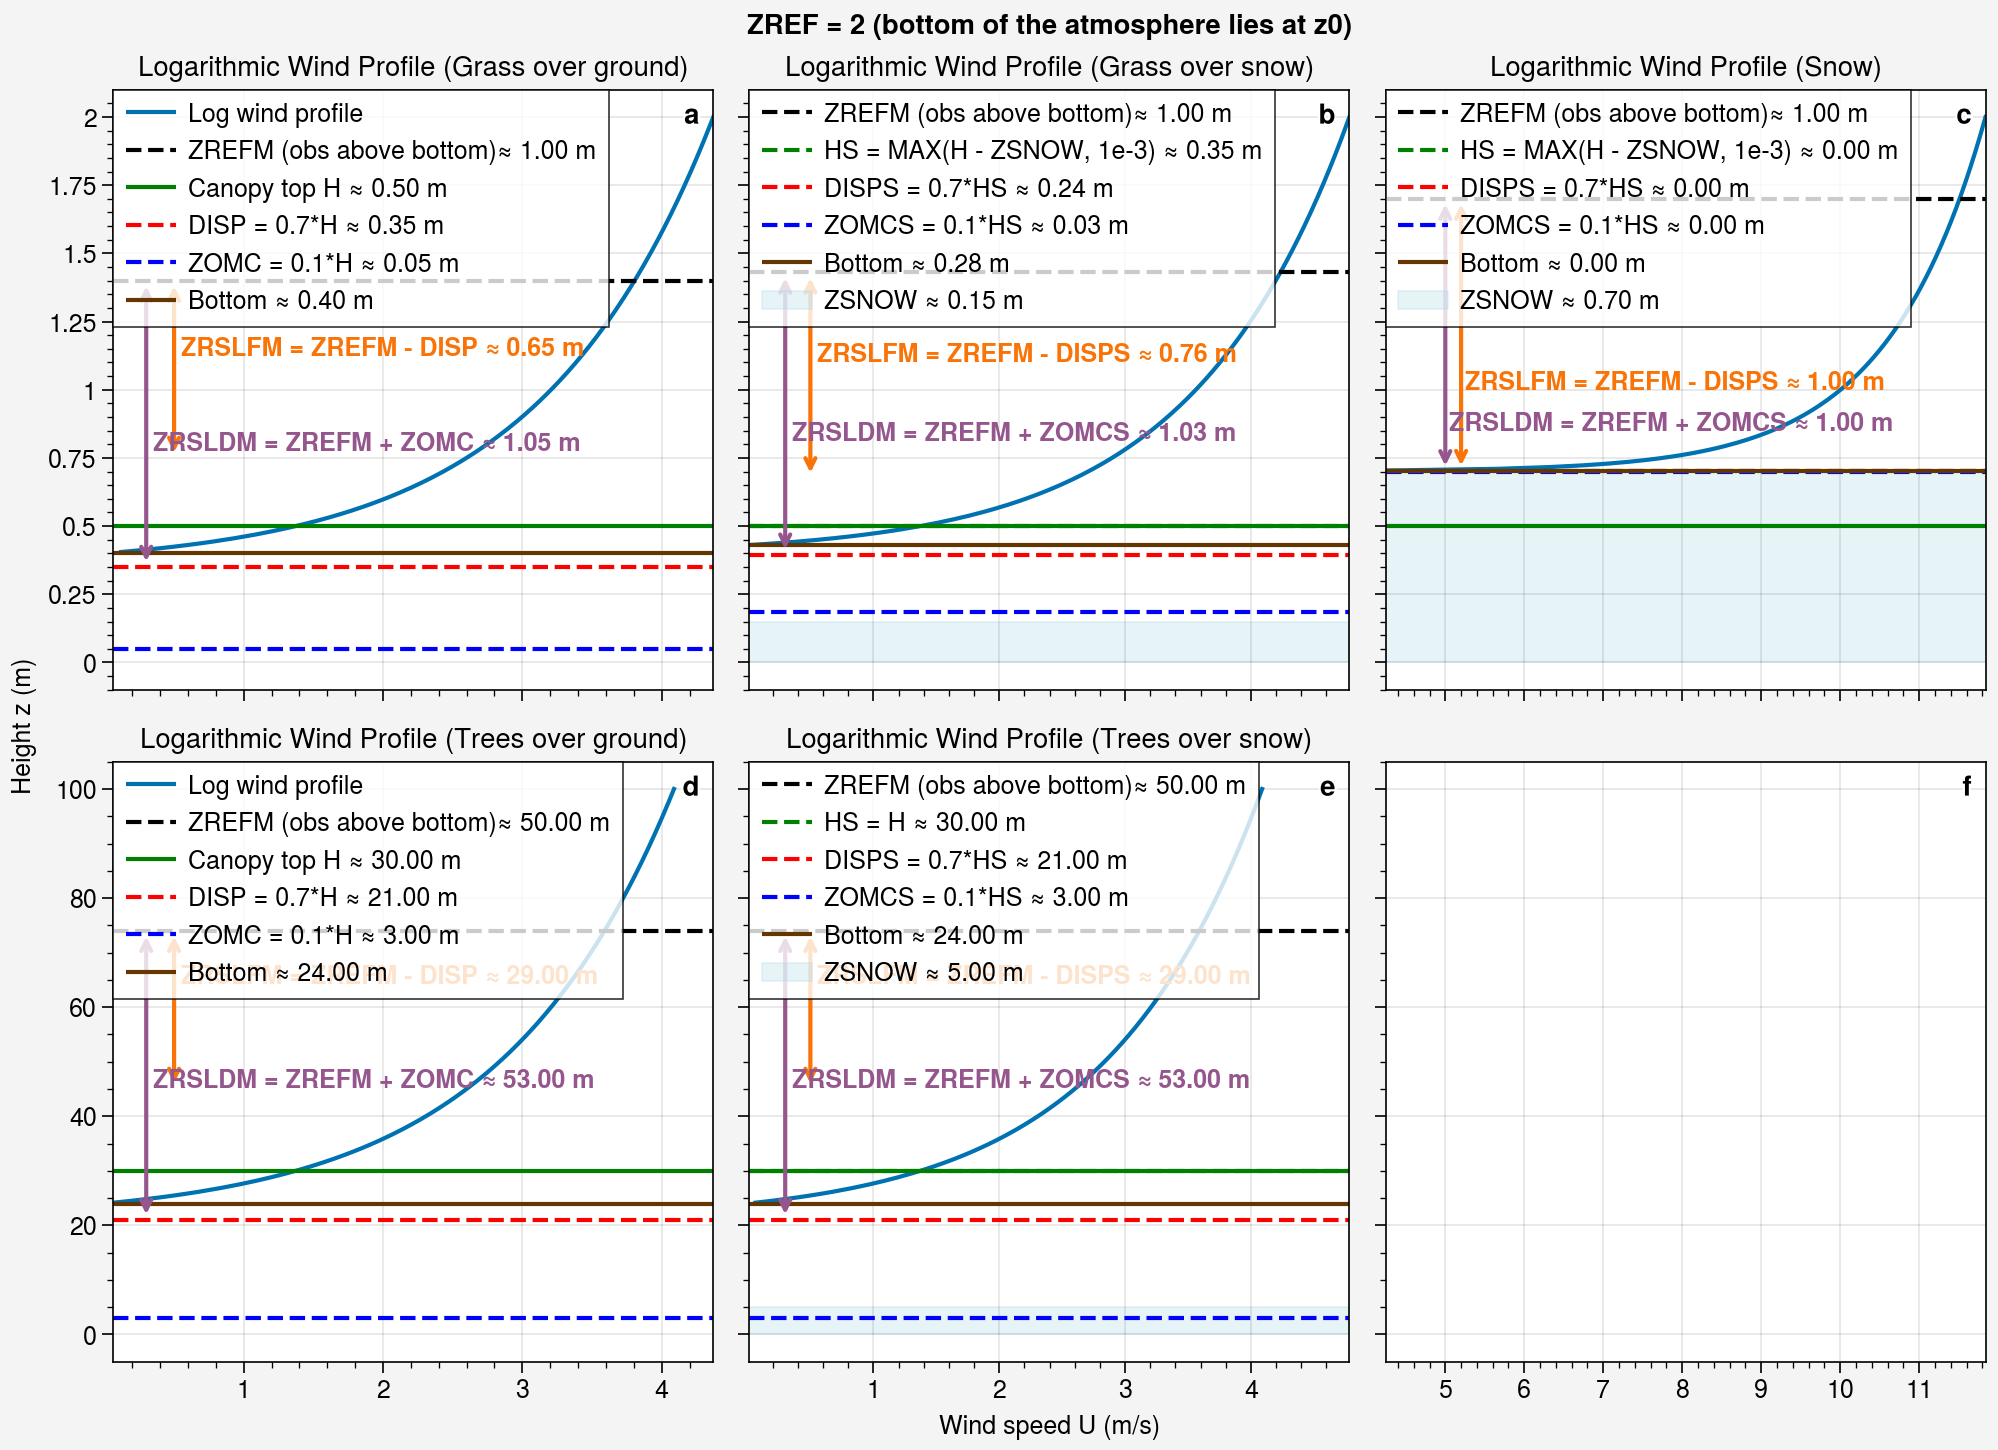

In [190]:
# Parameters
ZBLEND = 50.0 # atmospheric blending height for surface roughness length averaging (\f$z_b\f$) [m]
kappa = 0.4  # von Kármán constant
u_star = 0.5  # friction velocity (m/s)

fig, axs = pplt.subplots(nrows=2, ncols=3, refwidth=3)

############
## GRASS ###
############

H = 0.5 # Vegetation height [m]
ZOMC = 0.1 * H # Roughness length for momentum of vegetation over bare ground [m]
DISP = 0.7 * H # Displacement height of vegetation over ground (d) [m]
ZREFM = 1.0 # Obs height above the ground [m]

# Vertical profile
z = np.linspace(0.1, 2, 300)  # height above ground (m)

# Logarithmic wind profile (neutral conditions)
U = (u_star / kappa) * np.log((z - DISP) / ZOMC) 
U[z <= DISP + ZOMC] = np.nan  # undefined below (d+z0)

# Calculate ZRSLDM and ZRSLFM
ZRSLDM = ZREFM + ZOMC
ZRSLFM = ZREFM - DISP

# Plot
ax = axs[0]
ax.plot(U, z, label="Log wind profile")
ax.axhline(y=DISP+ZOMC+ZREFM, color="black", linestyle="--", label=f"ZREFM (obs above bottom)≈ {ZREFM:.2f} m")
ax.axhline(y=H, color="green", linestyle="-", label=f"Canopy top H ≈ {H:.2f} m")
ax.axhline(y=DISP, color="red", linestyle="--", label=f"DISP = 0.7*H ≈ {DISP:.2f} m")
ax.axhline(y=ZOMC, color="blue", linestyle="--", label=f"ZOMC = 0.1*H ≈ {ZOMC:.2f} m")
ax.axhline(y=DISP+ZOMC, color="brown", linestyle="-", label=f"Bottom ≈ {DISP+ZOMC:.2f} m")

# Add ZRSLDM and ZRSLFM annotations
ax.annotate('', xy=(0.5, DISP+ZOMC+ZREFM), xytext=(0.5, DISP+ZOMC+ZREFM-ZRSLFM),
            arrowprops=dict(arrowstyle='<->', color='orange', lw=1.5))
ax.text(0.55, (2*(DISP+ZOMC+ZREFM) - ZRSLFM)/2+0.075, f"ZRSLFM = ZREFM - DISP ≈ {ZRSLFM:.2f} m", va='center', ha='left', 
        color='orange', fontweight='bold')

ax.annotate('', xy=(0.3, DISP+ZOMC+ZREFM), xytext=(0.3, DISP+ZOMC+ZREFM-ZRSLDM),
            arrowprops=dict(arrowstyle='<->', color='purple', lw=1.5))
ax.text(0.35, (2*(DISP+ZOMC+ZREFM) - ZRSLDM)/2-0.075, f"ZRSLDM = ZREFM + ZOMC ≈ {ZRSLDM:.2f} m", va='center', ha='left', 
        color='purple', fontweight='bold')



ax.format(
    xlabel="Wind speed U (m/s)",
    ylabel="Height z (m)",
    title="Logarithmic Wind Profile (Grass over ground)"
)
ax.legend(ncol=1, loc='ul')

# Subplot with grass over snow
ZSNOW = 0.15
HS = np.maximum(H - ZSNOW, 1.0e-3)
DISPS = 0.7 * HS # Displacement height of vegetation over snow (d) [m]
ZOMCS = 0.1 * HS # roughness length for momentum of vegetation over snow [ ]

# Logarithmic wind profile (neutral conditions)
U = (u_star / kappa) * np.log((z - DISPS - ZSNOW) / ZOMCS) 
U[z <= DISPS + ZOMCS + ZSNOW] = np.nan  # undefined below (d+z0)

# Calculate ZRSLDM and ZRSLFM for snow case
ZRSLDM = ZREFM + ZOMCS
ZRSLFM = ZREFM - DISPS

# Plot
ax = axs[1]
# Add snow shading
ax.axhspan(0, ZSNOW, alpha=0.3, color='lightblue', label=f"ZSNOW ≈ {ZSNOW:.2f} m")
ax.plot(U, z)
ax.axhline(y=DISPS+ZOMCS+ZREFM+ZSNOW, color="black", linestyle="--", label=f"ZREFM (obs above bottom)≈ {ZREFM:.2f} m")
ax.axhline(y=H, color="green", linestyle="-")
ax.axhline(y=HS+ZSNOW, color="green", linestyle="--", label=f"HS = MAX(H - ZSNOW, 1e-3) ≈ {HS:.2f} m")
ax.axhline(y=DISPS+ZSNOW, color="red", linestyle="--", label=f"DISPS = 0.7*HS ≈ {DISPS:.2f} m")
ax.axhline(y=ZOMCS+ZSNOW, color="blue", linestyle="--", label=f"ZOMCS = 0.1*HS ≈ {ZOMCS:.2f} m")
ax.axhline(y=DISPS+ZOMCS+ZSNOW, color="brown", linestyle="-", label=f"Bottom ≈ {DISPS+ZOMCS:.2f} m")

# Add ZRSLDM and ZRSLFM annotations
ax.annotate('', xy=(0.5, DISPS+ZOMCS+ZREFM+ZSNOW), xytext=(0.5, DISPS+ZOMCS+ZREFM+ZSNOW-ZRSLFM),
            arrowprops=dict(arrowstyle='<->', color='orange', lw=1.5))
ax.text(0.55, (2*(DISPS+ZOMCS+ZREFM+ZSNOW) - ZRSLFM)/2+0.075, f"ZRSLFM = ZREFM - DISPS ≈ {ZRSLFM:.2f} m", va='center', ha='left', 
        color='orange', fontweight='bold')

ax.annotate('', xy=(0.3, DISPS+ZOMCS+ZREFM+ZSNOW), xytext=(0.3, DISPS+ZOMCS+ZREFM+ZSNOW-ZRSLDM),
            arrowprops=dict(arrowstyle='<->', color='purple', lw=1.5))
ax.text(0.35, (2*(DISPS+ZOMCS+ZREFM+ZSNOW) - ZRSLDM)/2-0.075, f"ZRSLDM = ZREFM + ZOMCS ≈ {ZRSLDM:.2f} m", va='center', ha='left', 
        color='purple', fontweight='bold')

ax.format(
    xlabel="Wind speed U (m/s)",
    ylabel="Height z (m)",
    title="Logarithmic Wind Profile (Grass over snow)"
)
ax.legend(ncol=1, loc='ul')



# Subplot with deep snow
ZSNOW = 0.70
HS = np.maximum(H - ZSNOW, 1.0e-3)
DISPS = 0.7 * HS # Displacement height of vegetation over snow (d) [m]
ZOMCS = 0.1 * HS # roughness length for momentum of vegetation over snow [ ]

# Logarithmic wind profile (neutral conditions)
U = (u_star / kappa) * np.log((z - DISPS - ZSNOW) / ZOMCS) 
U[z <= DISPS + ZOMCS + ZSNOW] = np.nan  # undefined below (d+z0)

# Calculate ZRSLDM and ZRSLFM for deep snow case
ZRSLDM = ZREFM + ZOMCS
ZRSLFM = ZREFM - DISPS

# Plot
ax = axs[2]
# Add snow shading
ax.axhspan(0, ZSNOW, alpha=0.3, color='lightblue', label=f"ZSNOW ≈ {ZSNOW:.2f} m")
ax.plot(U, z)
ax.axhline(y=DISPS+ZOMCS+ZREFM+ZSNOW, color="black", linestyle="--", label=f"ZREFM (obs above bottom)≈ {ZREFM:.2f} m")
ax.axhline(y=H, color="green", linestyle="-")
ax.axhline(y=HS+ZSNOW, color="green", linestyle="--", label=f"HS = MAX(H - ZSNOW, 1e-3) ≈ {HS:.2f} m")
ax.axhline(y=DISPS+ZSNOW, color="red", linestyle="--", label=f"DISPS = 0.7*HS ≈ {DISPS:.2f} m")
ax.axhline(y=ZOMCS+ZSNOW, color="blue", linestyle="--", label=f"ZOMCS = 0.1*HS ≈ {ZOMCS:.2f} m")
ax.axhline(y=DISPS+ZOMCS+ZSNOW, color="brown", linestyle="-", label=f"Bottom ≈ {DISPS+ZOMCS:.2f} m")

# Add ZRSLDM and ZRSLFM annotations
ax.annotate('', xy=(5.2, DISPS+ZOMCS+ZREFM+ZSNOW), xytext=(5.2, DISPS+ZOMCS+ZREFM+ZSNOW-ZRSLFM),
            arrowprops=dict(arrowstyle='<->', color='orange', lw=1.5))
ax.text(5.25, (2*(DISPS+ZOMCS+ZREFM+ZSNOW) - ZRSLFM)/2+0.075-0.25, f"ZRSLFM = ZREFM - DISPS ≈ {ZRSLFM:.2f} m", va='center', ha='left', 
        color='orange', fontweight='bold')

ax.annotate('', xy=(5.0, DISPS+ZOMCS+ZREFM+ZSNOW), xytext=(5.0, DISPS+ZOMCS+ZREFM+ZSNOW-ZRSLDM),
            arrowprops=dict(arrowstyle='<->', color='purple', lw=1.5))
ax.text(5.05, (2*(DISPS+ZOMCS+ZREFM+ZSNOW) - ZRSLDM)/2-0.075-0.25, f"ZRSLDM = ZREFM + ZOMCS ≈ {ZRSLDM:.2f} m", va='center', ha='left', 
        color='purple', fontweight='bold')

ax.format(
    xlabel="Wind speed U (m/s)",
    ylabel="Height z (m)",
    title="Logarithmic Wind Profile (Snow)"
)
ax.legend(ncol=1, loc='ul')

############
## TREES ###
############

H = 30 # Vegetation height [m]
ZOMC = 0.1 * H # Roughness length for momentum of vegetation over bare ground [m]
DISP = 0.7 * H # Displacement height of vegetation over ground (d) [m]
ZREFM = 50.0 # Obs height above the ground [m]

# Vertical profile
z = np.linspace(0.1, 100, 300)  # height above ground (m)

# Logarithmic wind profile (neutral conditions)
U = (u_star / kappa) * np.log((z - DISP) / ZOMC) 
U[z <= DISP + ZOMC] = np.nan  # undefined below (d+z0)

# Calculate ZRSLDM and ZRSLFM for trees
ZRSLDM = ZREFM + ZOMC
ZRSLFM = ZREFM - DISP

# Plot
ax = axs[3]
ax.plot(U, z, label="Log wind profile")
ax.axhline(y=DISP+ZOMC+ZREFM, color="black", linestyle="--", label=f"ZREFM (obs above bottom)≈ {ZREFM:.2f} m")
ax.axhline(y=H, color="green", linestyle="-", label=f"Canopy top H ≈ {H:.2f} m")
ax.axhline(y=DISP, color="red", linestyle="--", label=f"DISP = 0.7*H ≈ {DISP:.2f} m")
ax.axhline(y=ZOMC, color="blue", linestyle="--", label=f"ZOMC = 0.1*H ≈ {ZOMC:.2f} m")
ax.axhline(y=DISP+ZOMC, color="brown", linestyle="-", label=f"Bottom ≈ {DISP+ZOMC:.2f} m")

# Add ZRSLDM and ZRSLFM annotations
ax.annotate('', xy=(0.5, DISP+ZOMC+ZREFM), xytext=(0.5, DISP+ZOMC+ZREFM-ZRSLFM),
            arrowprops=dict(arrowstyle='<->', color='orange', lw=1.5))
ax.text(0.55, (2*(DISP+ZOMC+ZREFM) - ZRSLFM)/2+6, f"ZRSLFM = ZREFM - DISP ≈ {ZRSLFM:.2f} m", va='center', ha='left', 
        color='orange', fontweight='bold')

ax.annotate('', xy=(0.3, DISP+ZOMC+ZREFM), xytext=(0.3, DISP+ZOMC+ZREFM-ZRSLDM),
            arrowprops=dict(arrowstyle='<->', color='purple', lw=1.5))
ax.text(0.35, (2*(DISP+ZOMC+ZREFM) - ZRSLDM)/2-1, f"ZRSLDM = ZREFM + ZOMC ≈ {ZRSLDM:.2f} m", va='center', ha='left', 
        color='purple', fontweight='bold')

ax.format(
    xlabel="Wind speed U (m/s)",
    ylabel="Height z (m)",
    title="Logarithmic Wind Profile (Trees over ground)"
)
ax.legend(ncol=1, loc='ul')



# Subplot with trees over snow
ZSNOW = 5.0
# HS = np.maximum(H - ZSNOW, 1.0e-3)
HS = H
DISPS = 0.7 * HS # Displacement height of vegetation over snow (d) [m]
ZOMCS = 0.1 * HS # roughness length for momentum of vegetation over snow [ ]

# Logarithmic wind profile (neutral conditions)
U = (u_star / kappa) * np.log((z - DISPS) / ZOMCS) 
U[z <= DISPS + ZOMCS] = np.nan  # undefined below (d+z0)

# Calculate ZRSLDM and ZRSLFM for trees over snow
ZRSLDM = ZREFM + ZOMCS
ZRSLFM = ZREFM - DISPS

# Plot
ax = axs[4]
# Add snow shading
ax.axhspan(0, ZSNOW, alpha=0.3, color='lightblue', label=f"ZSNOW ≈ {ZSNOW:.2f} m")
ax.plot(U, z)
ax.axhline(y=DISPS+ZOMCS+ZREFM, color="black", linestyle="--", label=f"ZREFM (obs above bottom)≈ {ZREFM:.2f} m")
ax.axhline(y=H, color="green", linestyle="-")
ax.axhline(y=HS, color="green", linestyle="--", label=f"HS = H ≈ {HS:.2f} m")
ax.axhline(y=DISPS, color="red", linestyle="--", label=f"DISPS = 0.7*HS ≈ {DISPS:.2f} m")
ax.axhline(y=ZOMCS, color="blue", linestyle="--", label=f"ZOMCS = 0.1*HS ≈ {ZOMCS:.2f} m")
ax.axhline(y=DISPS+ZOMCS, color="brown", linestyle="-", label=f"Bottom ≈ {DISPS+ZOMCS:.2f} m")

# Add ZRSLDM and ZRSLFM annotations
ax.annotate('', xy=(0.5, DISPS+ZOMCS+ZREFM), xytext=(0.5, DISPS+ZOMCS+ZREFM-ZRSLFM),
            arrowprops=dict(arrowstyle='<->', color='orange', lw=1.5))
ax.text(0.55, (2*(DISPS+ZOMCS+ZREFM) - ZRSLFM)/2+6, f"ZRSLFM = ZREFM - DISPS ≈ {ZRSLFM:.2f} m", va='center', ha='left', 
        color='orange', fontweight='bold')

ax.annotate('', xy=(0.3, DISPS+ZOMCS+ZREFM), xytext=(0.3, DISPS+ZOMCS+ZREFM-ZRSLDM),
            arrowprops=dict(arrowstyle='<->', color='purple', lw=1.5))
ax.text(0.35, (2*(DISPS+ZOMCS+ZREFM) - ZRSLDM)/2-1, f"ZRSLDM = ZREFM + ZOMCS ≈ {ZRSLDM:.2f} m", va='center', ha='left', 
        color='purple', fontweight='bold')

ax.format(
    xlabel="Wind speed U (m/s)",
    ylabel="Height z (m)",
    title="Logarithmic Wind Profile (Trees over snow)"
)
ax.legend(ncol=1, loc='ul')

axs.format(abc=True, abcloc='ur')
fig.suptitle('ZREF = 2 (bottom of the atmosphere lies at z0)')
# fig.save("img/wind_profiles_ZREF2.pdf")

## ZREF == 2 (correct?)

/tmp/ipykernel_159745/1574691989.py:22: RuntimeWarning: invalid value encountered in log
  U = (u_star / kappa) * np.log((z - DISP) / ZOMC)
/tmp/ipykernel_159745/1574691989.py:65: RuntimeWarning: invalid value encountered in log
  U = (u_star / kappa) * np.log((z - DISPS - ZSNOW) / ZOMCS)
/tmp/ipykernel_159745/1574691989.py:111: RuntimeWarning: invalid value encountered in log
  U = (u_star / kappa) * np.log((z - DISPS - ZSNOW) / ZOMCS)
/tmp/ipykernel_159745/1574691989.py:161: RuntimeWarning: invalid value encountered in log
  U = (u_star / kappa) * np.log((z - DISP) / ZOMC)
/tmp/ipykernel_159745/1574691989.py:205: RuntimeWarning: invalid value encountered in log
  U = (u_star / kappa) * np.log((z - DISPS - ZSNOW) / ZOMCS)


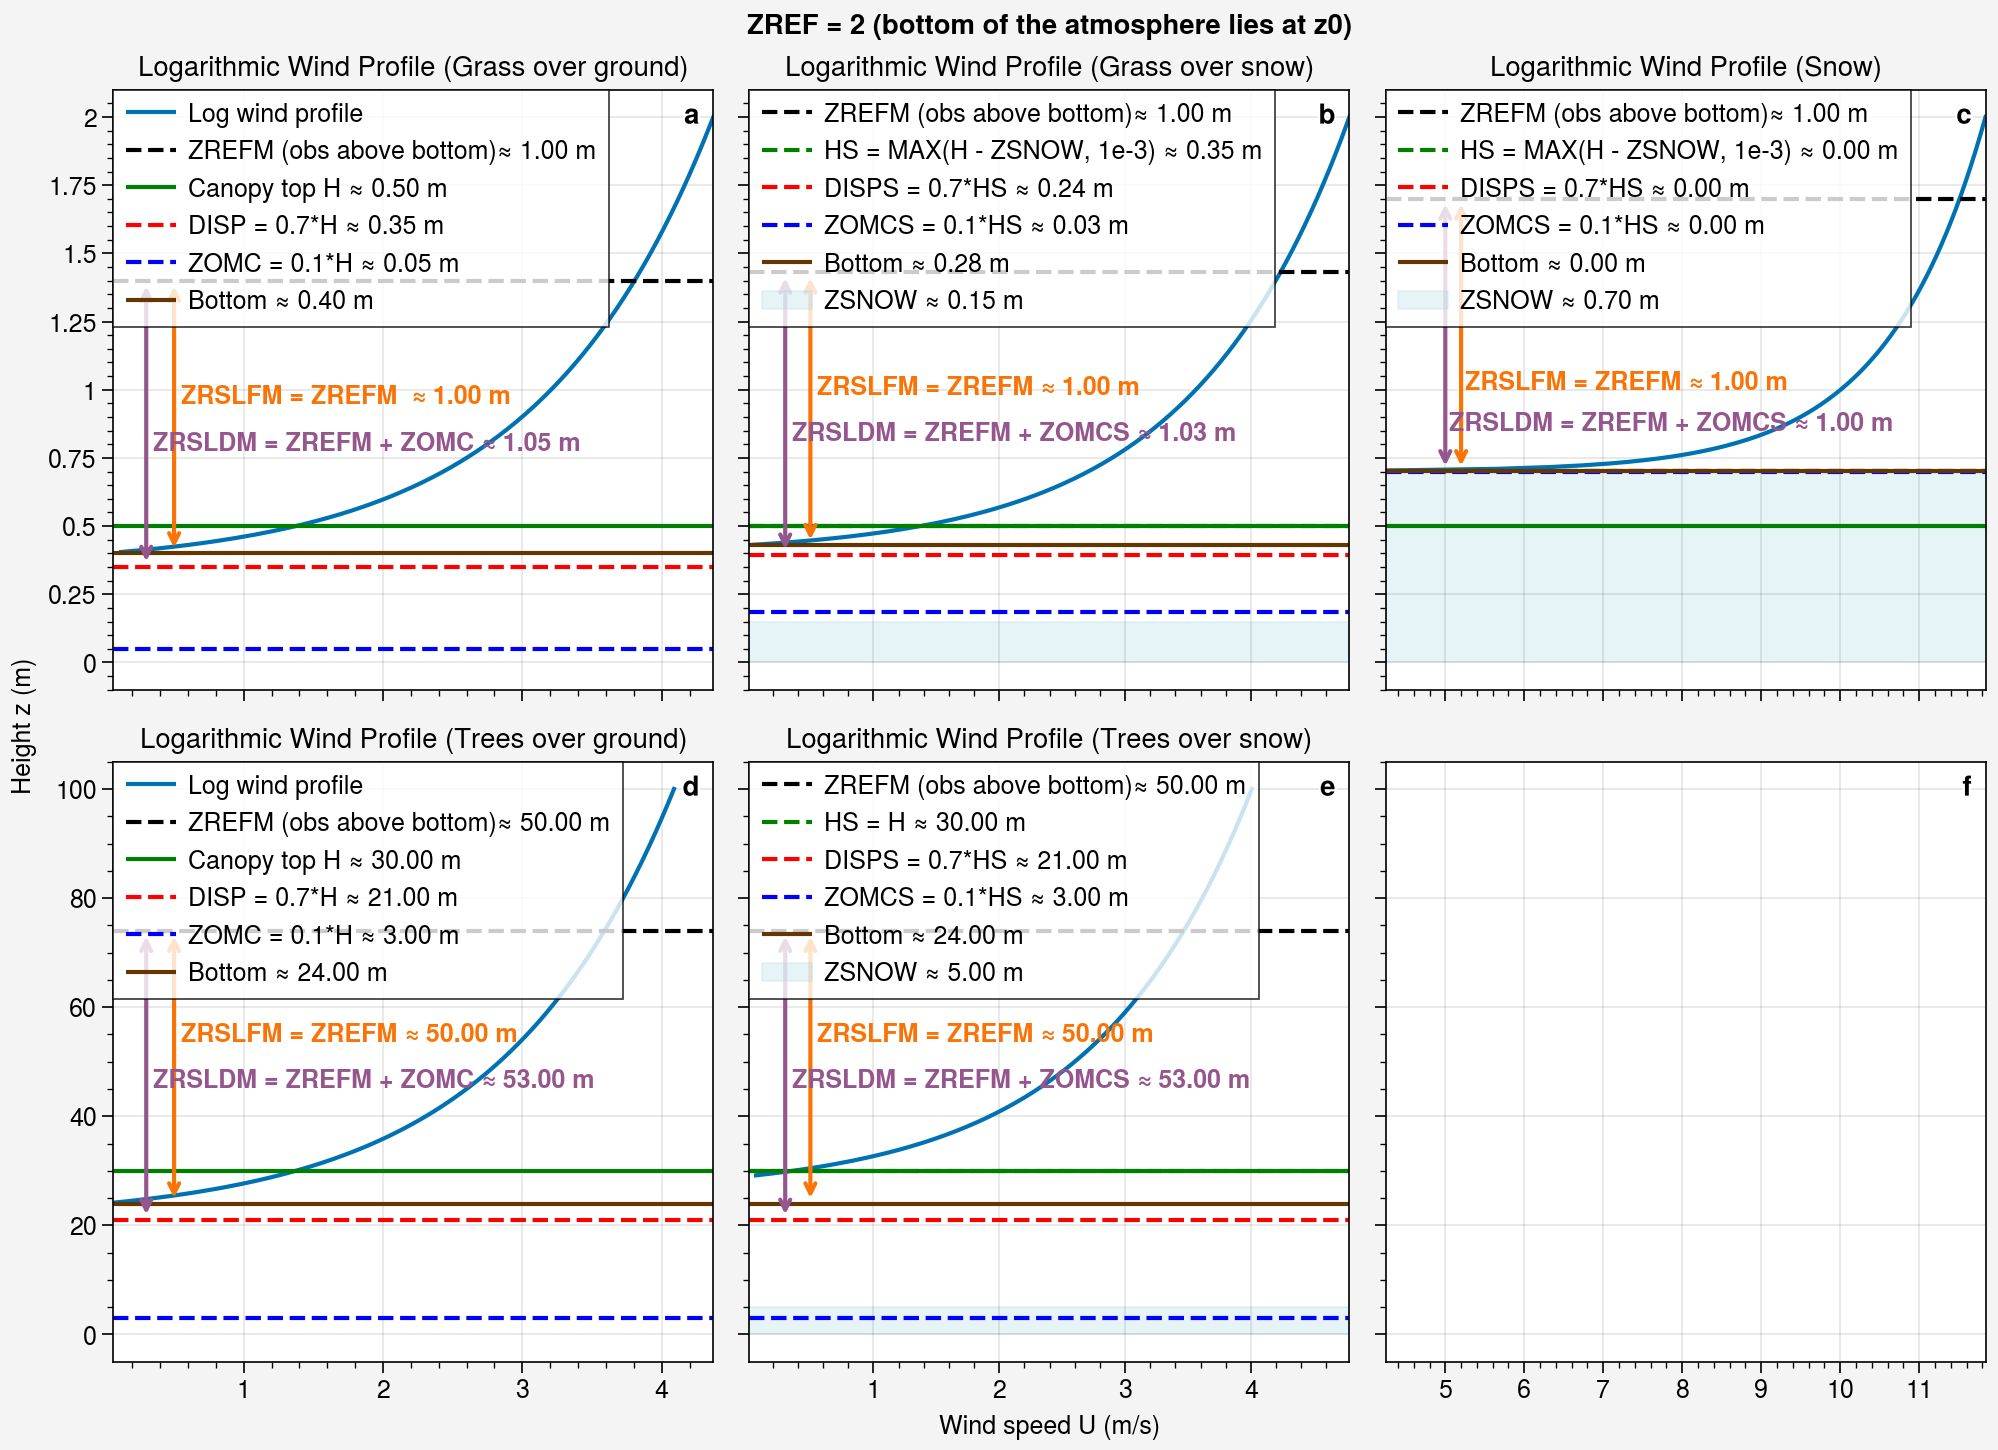

In [189]:
# Parameters
ZBLEND = 50.0 # atmospheric blending height for surface roughness length averaging (\f$z_b\f$) [m]
kappa = 0.4  # von Kármán constant
u_star = 0.5  # friction velocity (m/s)

fig, axs = pplt.subplots(nrows=2, ncols=3, refwidth=3)

############
## GRASS ###
############

H = 0.5 # Vegetation height [m]
ZOMC = 0.1 * H # Roughness length for momentum of vegetation over bare ground [m]
DISP = 0.7 * H # Displacement height of vegetation over ground (d) [m]
ZREFM = 1.0 # Obs height above the ground [m]
ZSNOW = 0.0

# Vertical profile
z = np.linspace(0.1, 2, 300)  # height above ground (m)

# Logarithmic wind profile (neutral conditions)
U = (u_star / kappa) * np.log((z - DISP) / ZOMC) 
U[z <= DISP + ZOMC] = np.nan  # undefined below (d+z0)

# Calculate ZRSLDM and ZRSLFM
ZRSLDM = ZREFM + ZOMC 
ZRSLFM = ZREFM  

# Plot
ax = axs[0]
ax.plot(U, z, label="Log wind profile")
ax.axhline(y=DISP+ZOMC+ZREFM, color="black", linestyle="--", label=f"ZREFM (obs above bottom)≈ {ZREFM:.2f} m")
ax.axhline(y=H, color="green", linestyle="-", label=f"Canopy top H ≈ {H:.2f} m")
ax.axhline(y=DISP, color="red", linestyle="--", label=f"DISP = 0.7*H ≈ {DISP:.2f} m")
ax.axhline(y=ZOMC, color="blue", linestyle="--", label=f"ZOMC = 0.1*H ≈ {ZOMC:.2f} m")
ax.axhline(y=DISP+ZOMC, color="brown", linestyle="-", label=f"Bottom ≈ {DISP+ZOMC:.2f} m")

# Add ZRSLDM and ZRSLFM annotations
ax.annotate('', xy=(0.5, DISP+ZOMC+ZREFM), xytext=(0.5, DISP+ZOMC+ZREFM-ZRSLFM),
            arrowprops=dict(arrowstyle='<->', color='orange', lw=1.5))
ax.text(0.55, (2*(DISP+ZOMC+ZREFM) - ZRSLFM)/2+0.075, f"ZRSLFM = ZREFM  ≈ {ZRSLFM:.2f} m", va='center', ha='left', 
        color='orange', fontweight='bold')

ax.annotate('', xy=(0.3, DISP+ZOMC+ZREFM), xytext=(0.3, DISP+ZOMC+ZREFM-ZRSLDM),
            arrowprops=dict(arrowstyle='<->', color='purple', lw=1.5))
ax.text(0.35, (2*(DISP+ZOMC+ZREFM) - ZRSLDM)/2-0.075, f"ZRSLDM = ZREFM + ZOMC ≈ {ZRSLDM:.2f} m", va='center', ha='left', 
        color='purple', fontweight='bold')



ax.format(
    xlabel="Wind speed U (m/s)",
    ylabel="Height z (m)",
    title="Logarithmic Wind Profile (Grass over ground)"
)
ax.legend(ncol=1, loc='ul')

# Subplot with grass over snow
ZSNOW = 0.15
HS = np.maximum(H - ZSNOW, 1.0e-3)
DISPS = 0.7 * HS # Displacement height of vegetation over snow (d) [m]
ZOMCS = 0.1 * HS # roughness length for momentum of vegetation over snow [ ]

# Logarithmic wind profile (neutral conditions)
U = (u_star / kappa) * np.log((z - DISPS - ZSNOW) / ZOMCS) 
U[z <= DISPS + ZOMCS + ZSNOW] = np.nan  # undefined below (d+z0)

# Calculate ZRSLDM and ZRSLFM for snow case
ZRSLDM = ZREFM + ZOMCS
ZRSLFM = ZREFM 

# Plot
ax = axs[1]
# Add snow shading
ax.axhspan(0, ZSNOW, alpha=0.3, color='lightblue', label=f"ZSNOW ≈ {ZSNOW:.2f} m")
ax.plot(U, z)
ax.axhline(y=DISPS+ZOMCS+ZREFM+ZSNOW, color="black", linestyle="--", label=f"ZREFM (obs above bottom)≈ {ZREFM:.2f} m")
ax.axhline(y=H, color="green", linestyle="-")
ax.axhline(y=HS+ZSNOW, color="green", linestyle="--", label=f"HS = MAX(H - ZSNOW, 1e-3) ≈ {HS:.2f} m")
ax.axhline(y=DISPS+ZSNOW, color="red", linestyle="--", label=f"DISPS = 0.7*HS ≈ {DISPS:.2f} m")
ax.axhline(y=ZOMCS+ZSNOW, color="blue", linestyle="--", label=f"ZOMCS = 0.1*HS ≈ {ZOMCS:.2f} m")
ax.axhline(y=DISPS+ZOMCS+ZSNOW, color="brown", linestyle="-", label=f"Bottom ≈ {DISPS+ZOMCS:.2f} m")

# Add ZRSLDM and ZRSLFM annotations
ax.annotate('', xy=(0.5, DISPS+ZOMCS+ZREFM+ZSNOW), xytext=(0.5, DISPS+ZOMCS+ZREFM+ZSNOW-ZRSLFM),
            arrowprops=dict(arrowstyle='<->', color='orange', lw=1.5))
ax.text(0.55, (2*(DISPS+ZOMCS+ZREFM+ZSNOW) - ZRSLFM)/2+0.075, f"ZRSLFM = ZREFM ≈ {ZRSLFM:.2f} m", va='center', ha='left', 
        color='orange', fontweight='bold')

ax.annotate('', xy=(0.3, DISPS+ZOMCS+ZREFM+ZSNOW), xytext=(0.3, DISPS+ZOMCS+ZREFM+ZSNOW-ZRSLDM),
            arrowprops=dict(arrowstyle='<->', color='purple', lw=1.5))
ax.text(0.35, (2*(DISPS+ZOMCS+ZREFM+ZSNOW) - ZRSLDM)/2-0.075, f"ZRSLDM = ZREFM + ZOMCS ≈ {ZRSLDM:.2f} m", va='center', ha='left', 
        color='purple', fontweight='bold')

ax.format(
    xlabel="Wind speed U (m/s)",
    ylabel="Height z (m)",
    title="Logarithmic Wind Profile (Grass over snow)"
)
ax.legend(ncol=1, loc='ul')



# Subplot with deep snow
ZSNOW = 0.70
HS = np.maximum(H - ZSNOW, 1.0e-3)
DISPS = 0.7 * HS # Displacement height of vegetation over snow (d) [m]
ZOMCS = 0.1 * HS # roughness length for momentum of vegetation over snow [ ]

# Logarithmic wind profile (neutral conditions)
U = (u_star / kappa) * np.log((z - DISPS - ZSNOW) / ZOMCS) 
U[z <= DISPS + ZOMCS + ZSNOW] = np.nan  # undefined below (d+z0)

# Calculate ZRSLDM and ZRSLFM for deep snow case
ZRSLDM = ZREFM + ZOMCS
ZRSLFM = ZREFM 

# Plot
ax = axs[2]
# Add snow shading
ax.axhspan(0, ZSNOW, alpha=0.3, color='lightblue', label=f"ZSNOW ≈ {ZSNOW:.2f} m")
ax.plot(U, z)
ax.axhline(y=DISPS+ZOMCS+ZREFM+ZSNOW, color="black", linestyle="--", label=f"ZREFM (obs above bottom)≈ {ZREFM:.2f} m")
ax.axhline(y=H, color="green", linestyle="-")
ax.axhline(y=HS+ZSNOW, color="green", linestyle="--", label=f"HS = MAX(H - ZSNOW, 1e-3) ≈ {HS:.2f} m")
ax.axhline(y=DISPS+ZSNOW, color="red", linestyle="--", label=f"DISPS = 0.7*HS ≈ {DISPS:.2f} m")
ax.axhline(y=ZOMCS+ZSNOW, color="blue", linestyle="--", label=f"ZOMCS = 0.1*HS ≈ {ZOMCS:.2f} m")
ax.axhline(y=DISPS+ZOMCS+ZSNOW, color="brown", linestyle="-", label=f"Bottom ≈ {DISPS+ZOMCS:.2f} m")

# Add ZRSLDM and ZRSLFM annotations
ax.annotate('', xy=(5.2, DISPS+ZOMCS+ZREFM+ZSNOW), xytext=(5.2, DISPS+ZOMCS+ZREFM+ZSNOW-ZRSLFM),
            arrowprops=dict(arrowstyle='<->', color='orange', lw=1.5))
ax.text(5.25, (2*(DISPS+ZOMCS+ZREFM+ZSNOW) - ZRSLFM)/2+0.075-0.25, f"ZRSLFM = ZREFM ≈ {ZRSLFM:.2f} m", va='center', ha='left', 
        color='orange', fontweight='bold')

ax.annotate('', xy=(5.0, DISPS+ZOMCS+ZREFM+ZSNOW), xytext=(5.0, DISPS+ZOMCS+ZREFM+ZSNOW-ZRSLDM),
            arrowprops=dict(arrowstyle='<->', color='purple', lw=1.5))
ax.text(5.05, (2*(DISPS+ZOMCS+ZREFM+ZSNOW) - ZRSLDM)/2-0.075-0.25, f"ZRSLDM = ZREFM + ZOMCS ≈ {ZRSLDM:.2f} m", va='center', ha='left', 
        color='purple', fontweight='bold')

ax.format(
    xlabel="Wind speed U (m/s)",
    ylabel="Height z (m)",
    title="Logarithmic Wind Profile (Snow)"
)
ax.legend(ncol=1, loc='ul')

############
## TREES ###
############

H = 30 # Vegetation height [m]
ZOMC = 0.1 * H # Roughness length for momentum of vegetation over bare ground [m]
DISP = 0.7 * H # Displacement height of vegetation over ground (d) [m]
ZREFM = 50.0 # Obs height above the ground [m]

# Vertical profile
z = np.linspace(0.1, 100, 300)  # height above ground (m)

# Logarithmic wind profile (neutral conditions)
U = (u_star / kappa) * np.log((z - DISP) / ZOMC) 
U[z <= DISP + ZOMC] = np.nan  # undefined below (d+z0)

# Calculate ZRSLDM and ZRSLFM for trees
ZRSLDM = ZREFM + ZOMC
ZRSLFM = ZREFM 

# Plot
ax = axs[3]
ax.plot(U, z, label="Log wind profile")
ax.axhline(y=DISP+ZOMC+ZREFM, color="black", linestyle="--", label=f"ZREFM (obs above bottom)≈ {ZREFM:.2f} m")
ax.axhline(y=H, color="green", linestyle="-", label=f"Canopy top H ≈ {H:.2f} m")
ax.axhline(y=DISP, color="red", linestyle="--", label=f"DISP = 0.7*H ≈ {DISP:.2f} m")
ax.axhline(y=ZOMC, color="blue", linestyle="--", label=f"ZOMC = 0.1*H ≈ {ZOMC:.2f} m")
ax.axhline(y=DISP+ZOMC, color="brown", linestyle="-", label=f"Bottom ≈ {DISP+ZOMC:.2f} m")

# Add ZRSLDM and ZRSLFM annotations
ax.annotate('', xy=(0.5, DISP+ZOMC+ZREFM), xytext=(0.5, DISP+ZOMC+ZREFM-ZRSLFM),
            arrowprops=dict(arrowstyle='<->', color='orange', lw=1.5))
ax.text(0.55, (2*(DISP+ZOMC+ZREFM) - ZRSLFM)/2+6, f"ZRSLFM = ZREFM ≈ {ZRSLFM:.2f} m", va='center', ha='left', 
        color='orange', fontweight='bold')

ax.annotate('', xy=(0.3, DISP+ZOMC+ZREFM), xytext=(0.3, DISP+ZOMC+ZREFM-ZRSLDM),
            arrowprops=dict(arrowstyle='<->', color='purple', lw=1.5))
ax.text(0.35, (2*(DISP+ZOMC+ZREFM) - ZRSLDM)/2-1, f"ZRSLDM = ZREFM + ZOMC ≈ {ZRSLDM:.2f} m", va='center', ha='left', 
        color='purple', fontweight='bold')

ax.format(
    xlabel="Wind speed U (m/s)",
    ylabel="Height z (m)",
    title="Logarithmic Wind Profile (Trees over ground)"
)
ax.legend(ncol=1, loc='ul')



# Subplot with trees over snow
ZSNOW = 5.0
# HS = np.maximum(H - ZSNOW, 1.0e-3)
HS = H
DISPS = 0.7 * HS # Displacement height of vegetation over snow (d) [m]
ZOMCS = 0.1 * HS # roughness length for momentum of vegetation over snow [ ]

# Logarithmic wind profile (neutral conditions)
U = (u_star / kappa) * np.log((z - DISPS - ZSNOW) / ZOMCS) 
U[z <= DISPS + ZOMCS + ZSNOW] = np.nan  # undefined below (d+z0)

# Calculate ZRSLDM and ZRSLFM for trees over snow
ZRSLDM = ZREFM + ZOMCS
ZRSLFM = ZREFM

# Plot
ax = axs[4]
# Add snow shading
ax.axhspan(0, ZSNOW, alpha=0.3, color='lightblue', label=f"ZSNOW ≈ {ZSNOW:.2f} m")
ax.plot(U, z)
ax.axhline(y=DISPS+ZOMCS+ZREFM, color="black", linestyle="--", label=f"ZREFM (obs above bottom)≈ {ZREFM:.2f} m")
ax.axhline(y=H, color="green", linestyle="-")
ax.axhline(y=HS, color="green", linestyle="--", label=f"HS = H ≈ {HS:.2f} m")
ax.axhline(y=DISPS, color="red", linestyle="--", label=f"DISPS = 0.7*HS ≈ {DISPS:.2f} m")
ax.axhline(y=ZOMCS, color="blue", linestyle="--", label=f"ZOMCS = 0.1*HS ≈ {ZOMCS:.2f} m")
ax.axhline(y=DISPS+ZOMCS, color="brown", linestyle="-", label=f"Bottom ≈ {DISPS+ZOMCS:.2f} m")

# Add ZRSLDM and ZRSLFM annotations
ax.annotate('', xy=(0.5, DISPS+ZOMCS+ZREFM), xytext=(0.5, DISPS+ZOMCS+ZREFM-ZRSLFM),
            arrowprops=dict(arrowstyle='<->', color='orange', lw=1.5))
ax.text(0.55, (2*(DISPS+ZOMCS+ZREFM) - ZRSLFM)/2+6, f"ZRSLFM = ZREFM ≈ {ZRSLFM:.2f} m", va='center', ha='left', 
        color='orange', fontweight='bold')

ax.annotate('', xy=(0.3, DISPS+ZOMCS+ZREFM), xytext=(0.3, DISPS+ZOMCS+ZREFM-ZRSLDM),
            arrowprops=dict(arrowstyle='<->', color='purple', lw=1.5))
ax.text(0.35, (2*(DISPS+ZOMCS+ZREFM) - ZRSLDM)/2-1, f"ZRSLDM = ZREFM + ZOMCS ≈ {ZRSLDM:.2f} m", va='center', ha='left', 
        color='purple', fontweight='bold')

ax.format(
    xlabel="Wind speed U (m/s)",
    ylabel="Height z (m)",
    title="Logarithmic Wind Profile (Trees over snow)",
)
ax.legend(ncol=1, loc='ul')

axs.format(abc=True, abcloc='ur')
fig.suptitle('ZREF = 2 (bottom of the atmosphere lies at z0)')
# fig.save("img/wind_profiles_ZREF2_correct.pdf")